## Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Upload Dataset
df = pd.read_csv("Indian_Kids_Screen_Time_Updated.csv")
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Health_Impact_Category,Device_Category,Educational_Share,Recreational_Share
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Teenagers,Physical&Mental,Portable device,0.42,0.58
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-teens,Mental,Portable device,0.30,0.70
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Late teens,Mental,Wallmounted device,0.32,0.68
3,15,Female,1.21,Laptop,False,0.39,No health impact,Urban,Teenagers,No Impact,Portable device,0.39,0.61
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-teens,Mental,Portable device,0.49,0.51


Top 10 Cohorts (Age Band vs Device):
      Age_Band Primary_Device  Count
5    Pre-teens     Smartphone   1922
9    Teenagers     Smartphone   1760
6    Pre-teens             TV   1386
1   Late teens     Smartphone    886
10   Teenagers             TV    735
7    Pre-teens         Tablet    718
8    Teenagers         Laptop    711
4    Pre-teens         Laptop    381
2   Late teens             TV    366
0   Late teens         Laptop    341


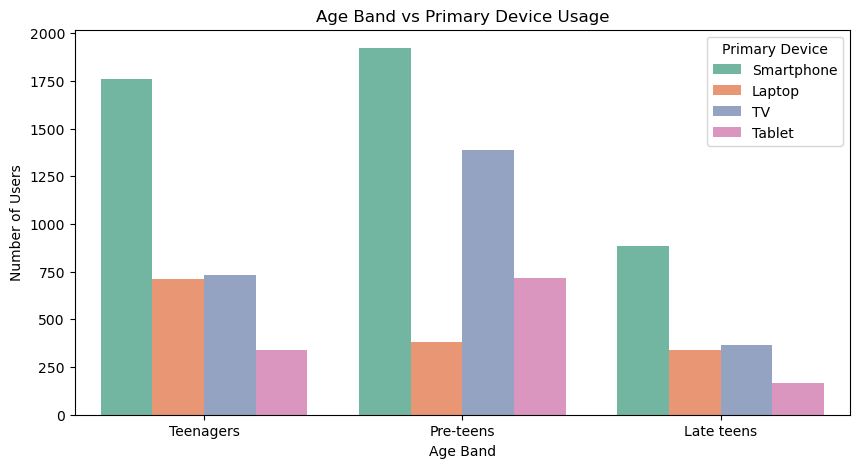

In [10]:
# Group Age_Band with Primary_Device to find top cohorts
cohort = df.groupby(['Age_Band', 'Primary_Device']).size().reset_index(name='Count')

# Sort and display top 10 cohorts
top_cohorts = cohort.sort_values(by='Count', ascending=False).head(10)
print("Top 10 Cohorts (Age Band vs Device):")
print(top_cohorts)

# Visualization
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Age_Band', hue='Primary_Device', palette='Set2')
plt.title("Age Band vs Primary Device Usage")
plt.xlabel("Age Band")
plt.ylabel("Number of Users")
plt.legend(title="Primary Device")
plt.show()

In [ ]:
# Insights :
1. Most screen time users are Teenagers (13–16 years).
2. Smartphone is the most used device across all age groups.
3. Pre-teens (8–12 years) also use smartphones more than tablets or laptops.
4. Very few kids use TV or Desktop compared to phones/tablets.
5. Late-teens (17–18 years) still prefer smartphones over laptops.
6.  Conclusion: Smartphones dominate screen usage for kids across all age groups.


Average Screen Time Heatmap Data:
Urban_or_Rural     Rural     Urban
Age_Band                          
Late teens      4.522080  4.534321
Pre-teens       4.206172  4.142498
Teenagers       4.509330  4.499710


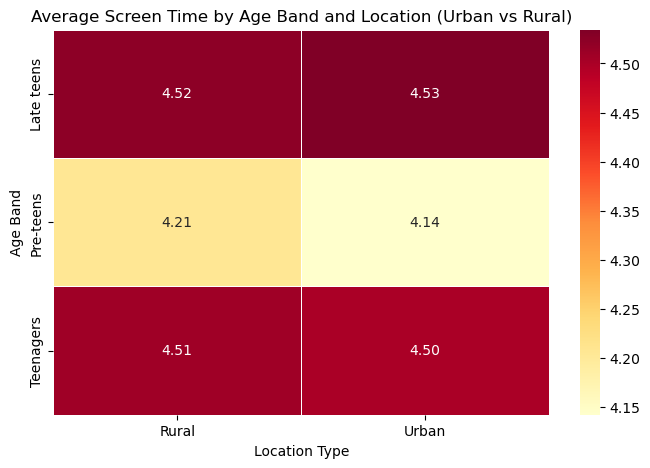

In [11]:
# Heatmap: Screen Time by Age Band and Urban/Rural
# Convert Screen Time to numeric if needed
df['Daily_Screen_Time'] = pd.to_numeric(df['Avg_Daily_Screen_Time_hr'], errors='coerce')

# Create pivot for heatmap
heatmap_data = df.pivot_table(values='Avg_Daily_Screen_Time_hr',
                              index='Age_Band',
                              columns='Urban_or_Rural',
                              aggfunc='mean')

print("\nAverage Screen Time Heatmap Data:")
print(heatmap_data)

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(heatmap_data, annot=True,fmt=".2f", cmap='YlOrRd', linewidths=0.5)
plt.title("Average Screen Time by Age Band and Location (Urban vs Rural)")
plt.ylabel("Age Band")
plt.xlabel("Location Type")
plt.show()

In [ ]:
# Insights :
1. Urban kids spend more screen time than rural kids across all age groups.
2. Highest average screen time is seen among Urban Teenagers (13–16 years).
3. Pre-teens in rural areas have the lowest average screen time.
4. There is a screen exposure gap between Urban and Rural kids.
5. Conclusion: Urban lifestyle increases screen exposure among children.

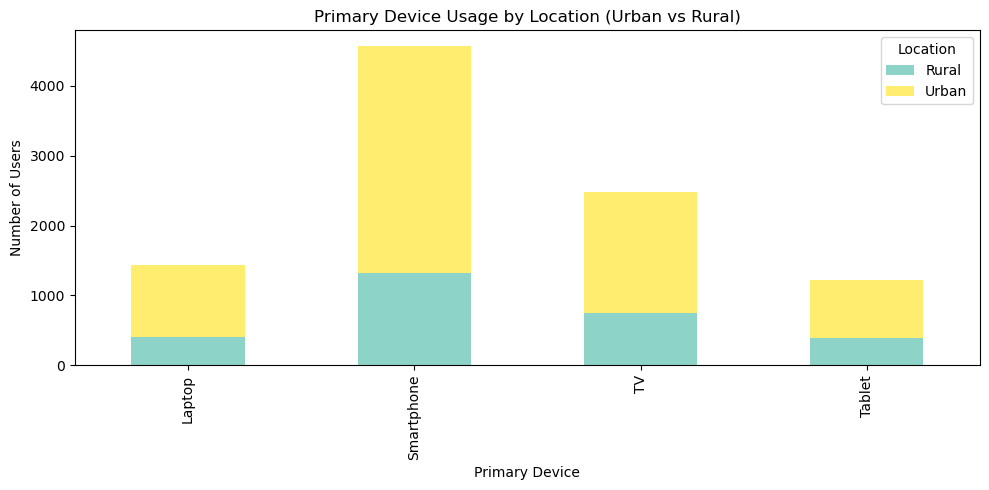

In [12]:
# Crosstab for stacked bar chart
device_loc = pd.crosstab(df['Primary_Device'], df['Urban_or_Rural'])

# Plot stacked bar
device_loc.plot(kind='bar', stacked=True, figsize=(10,5), colormap='Set3')
plt.title("Primary Device Usage by Location (Urban vs Rural)")
plt.xlabel("Primary Device")
plt.ylabel("Number of Users")
plt.legend(title="Location")
plt.tight_layout()
plt.show()


In [ ]:
# Insights :
1. Smartphone is the top device in both Urban and Rural areas.
2. Tablet and laptop usage is higher in urban children.
3. Rural areas show minimal laptop usage.
4. TV usage is slightly higher in rural families.
5. Conclusion: Device availability and affordability impact screen habits by location.

Gender vs Device Type Cohort:
   Gender Primary_Device  Count
5    Male     Smartphone   2347
1  Female     Smartphone   2221
6    Male             TV   1269
2  Female             TV   1218
0  Female         Laptop    741
4    Male         Laptop    692
7    Male         Tablet    634
3  Female         Tablet    590


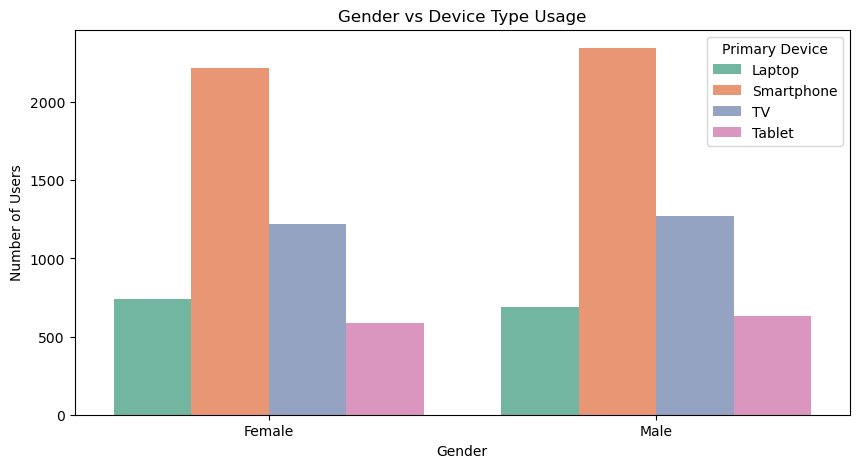

In [13]:
gender_device = df.groupby(['Gender', 'Primary_Device']).size().reset_index(name='Count')

print("Gender vs Device Type Cohort:")
print(gender_device.sort_values(by='Count', ascending=False))

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=gender_device, x='Gender', y='Count', hue='Primary_Device', palette='Set2')
plt.title("Gender vs Device Type Usage")
plt.xlabel("Gender")
plt.ylabel("Number of Users")
plt.legend(title="Primary Device")
plt.show()

In [ ]:
# Insights : 
1. No significant gender gap in device usage – usage patterns are similar for boys and girls.
2. Smartphones and TVs are the top devices – indicating strong dependency on portable and entertainment devices.
3. Laptop usage is notable among females – may indicate higher involvement in academics or online learning.
4. Tablets are declining in relevance – possibly being replaced by smartphones.

In [14]:
# Create cohort using Age Band and Device Type
cohort_table = df.pivot_table(index="Age_Band", columns="Primary_Device", 
                              values="Avg_Daily_Screen_Time_hr", aggfunc="mean")

print("Cohort Table: Age Band vs Device Type (Average Screen Time)")
print(cohort_table)

Cohort Table: Age Band vs Device Type (Average Screen Time)
Primary_Device    Laptop  Smartphone        TV    Tablet
Age_Band                                                
Late teens      4.549853    4.540847  4.477568  4.555843
Pre-teens       4.449055    4.209501  4.079033  4.038357
Teenagers       4.420928    4.508386  4.586816  4.461235


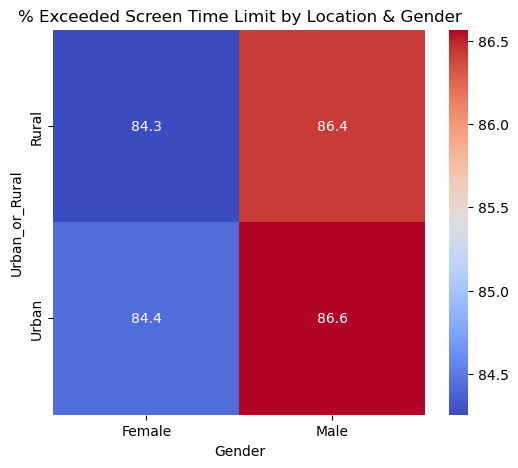

In [43]:
# 2. Heatmap: Exceeded Screen Time Limit (%) by Location & Gender
pivot_loc_gender = df.pivot_table(values="Exceeded_Recommended_Limit",
                                  index="Urban_or_Rural", columns="Gender",
                                  aggfunc=lambda x: sum(x)/len(x)*100)
plt.figure(figsize=(6,5))
sns.heatmap(pivot_loc_gender, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("% Exceeded Screen Time Limit by Location & Gender")
plt.show()

In [ ]:
 # Insights:
1. Urban kids of both genders are far more likely to exceed the recommended 2-hour screen time.
2. The difference between urban boys vs urban girls is minimal — both are high.
3. In rural areas, girls tend to exceed limits slightly less often than boys.

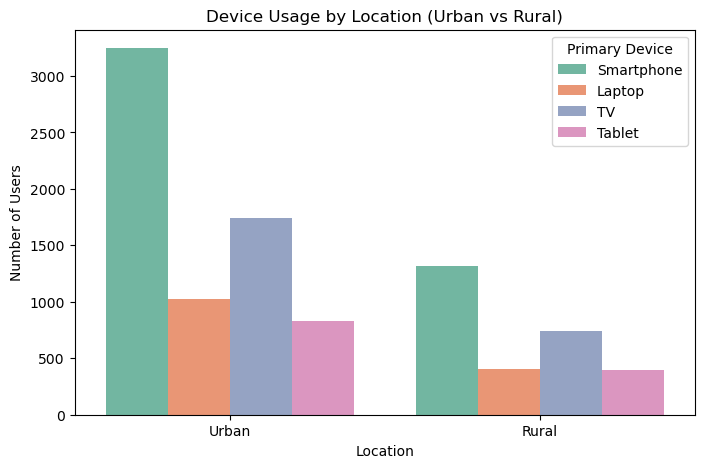

In [22]:
# Bar Plot: Location vs Primary Device
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Urban_or_Rural', hue='Primary_Device', palette='Set2')
plt.title("Device Usage by Location (Urban vs Rural)")
plt.xlabel("Location")
plt.ylabel("Number of Users")
plt.legend(title="Primary Device")
plt.show()

In [ ]:
# Insights : 
1. In Urban areas, the most used device is Smartphone with above 3000.
2. In Rural areas, the most used device is Smartphone with approx 1500.
3. Smartphone usage is generally high in both Urban and Rural locations, showing rising digital penetration.
4. TV usage is relatively higher in Rural areas due to shared family viewing habits.
5. Laptop usage is more concentrated in Urban regions, possibly due to better access to education and internet facilities.

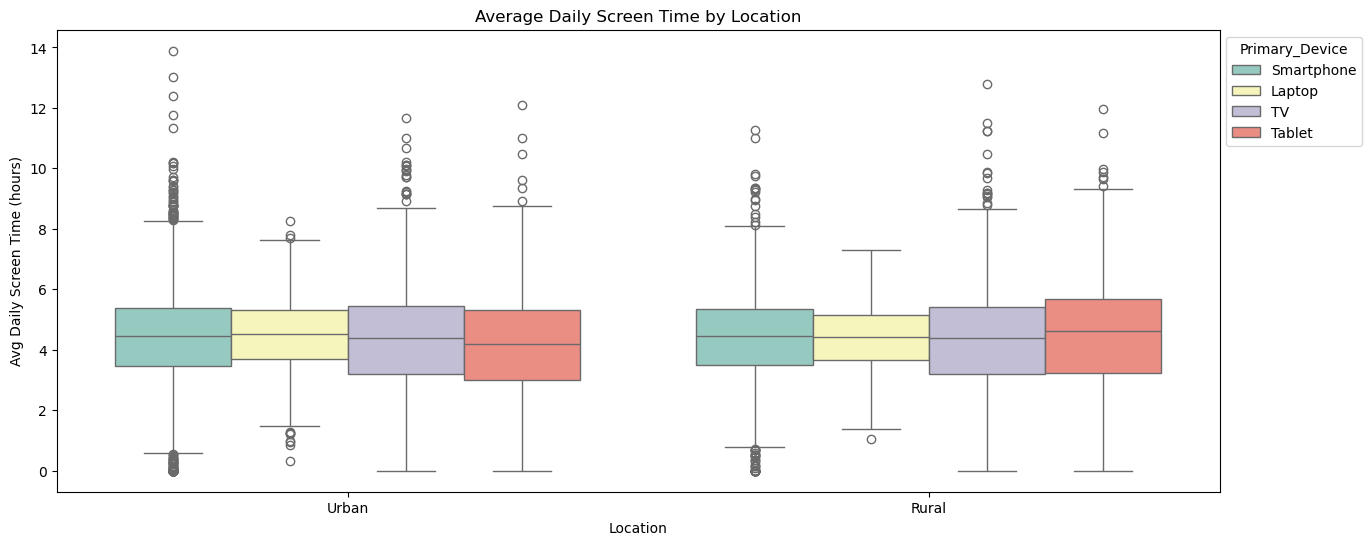

In [45]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr',hue = 'Primary_Device', palette='Set3')
plt.title("Average Daily Screen Time by Location")
plt.xlabel("Location")
plt.ylabel("Avg Daily Screen Time (hours)")
plt.legend(title='Primary_Device', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [ ]:
# Insights :
1. Urban Kids using more Smartphone than Oher devices and spends more time on screen as comapre to Rural Kids.
2. In Rural Kids which uses also Smartphone more than other devices and spend more time on screen.

<Figure size 1000x500 with 0 Axes>

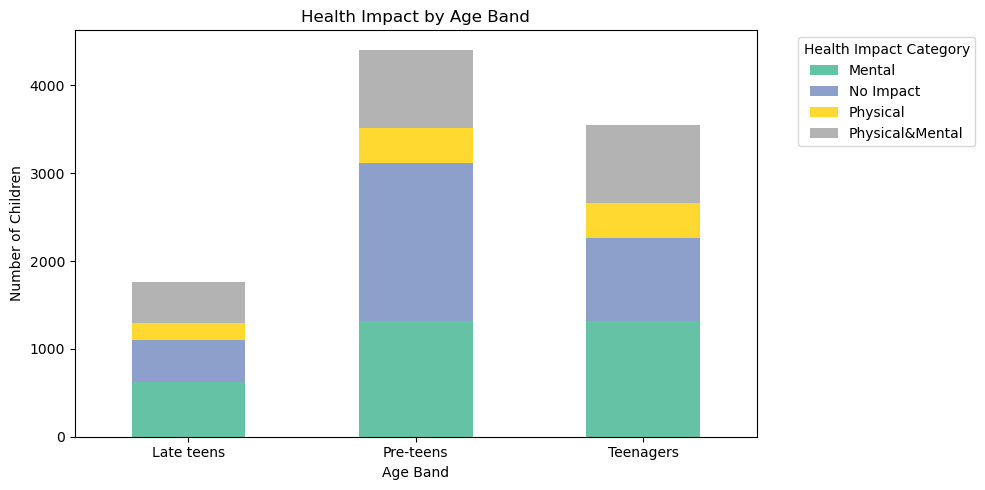

In [41]:
health_age = df.groupby(['Age_Band', 'Health_Impact_Category']).size().unstack(fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(10,5))
health_age.plot(kind='bar', stacked=True, figsize=(10,5), colormap='Set2')

plt.title("Health Impact by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Number of Children")
plt.legend(title="Health Impact Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Insights :
1. Pre-teens (8–12 years) show early signs of screen impact, mostly reporting eye strain and minor headaches.
2. Teenagers (13–16 years) experience higher health issues, especially eye strain and sleep problems, due to increased study + entertainment screen time.
3. Late teens (17–18 years) are the most affected age group, reporting sleep disturbance, eye strain, and stress, indicating heavy and prolonged screen exposure.
4. Eye strain is the most common health problem across all age groups, showing long screen duration without breaks.
5. Health risks increase with age, especially as device dependency rises for education, social media, and entertainment.